In [7]:
import pandas as pd
import numpy as np

PATH = 'test_withF_VT_Avg_1min_FULL.csv'

PATH_RAW = '123181_test_raw.csv'

df_raw = pd.read_csv(PATH_RAW, index_col= 'Timestamp')
df_raw.index = pd.to_datetime(df_raw.index)

df = pd.read_csv(PATH, index_col='Timestamp')
df.index = pd.to_datetime(df.index)


In [8]:
print(df.shape)

df = df.merge(df_raw['Low'], how='left',left_index=True,right_index=True)

print(df.shape)


(2314, 142)
(2314, 143)


<Axes: xlabel='Timestamp'>

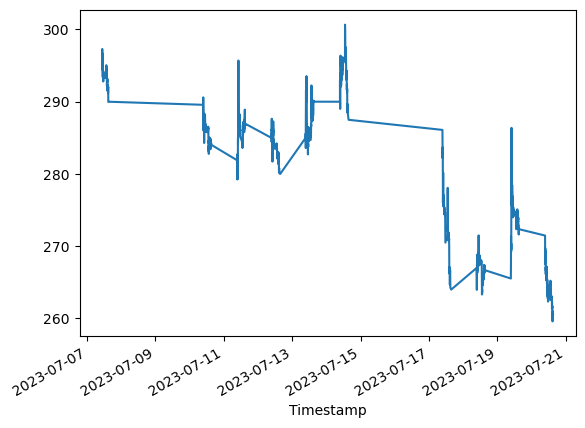

In [9]:
df['Low'].plot()

In [10]:
### 
## min bar

df['Flag_5low'] = np.where(
    (df['Low'].shift(-1) < df['Low']) |
    (df['Low'].shift(-2) < df['Low']) |
    (df['Low'].shift(-3) < df['Low']) |
    (df['Low'].shift(-4) < df['Low']) |
    (df['Low'].shift(-5) < df['Low'])
    ,
    1,  # If any condition is true, set target to 1
    0   # If all conditions are false, set target to 0
)
df['Flag_5low'].value_counts(1)

1    0.761452
0    0.238548
Name: Flag_5low, dtype: float64

In [11]:
df.drop(columns=['Low'], inplace=True)
print(df.columns)

Index(['tta_BOP', 'tta_NATR_timeperiod_7',
       'tta_STOCHRSI_timeperiod_19_fastk_period_4_fastd_period_11_0',
       'tta_STOCHRSI_timeperiod_19_fastk_period_4_fastd_period_11_1',
       'tta_CDLCLOSINGMARUBOZU',
       'tta_MACD_fastperiod_33_slowperiod_4_signalperiod_37_0',
       'tta_MACD_fastperiod_33_slowperiod_4_signalperiod_37_1',
       'tta_MACD_fastperiod_33_slowperiod_4_signalperiod_37_2',
       'tta_MINUS_DM_timeperiod_7',
       'tta_ULTOSC_timeperiod1_38_timeperiod2_6_timeperiod3_27',
       ...
       'STOCK_tta_CDLHANGINGMAN', 'STOCK_tta_CDL3INSIDE',
       'STOCK_tta_CDLDOJISTAR', 'STOCK_tta_CDLSHOOTINGSTAR',
       'STOCK_tta_CDLHARAMICROSS', 'STOCK_tta_CDLTHRUSTING',
       'STOCK_tta_CDLHOMINGPIGEON', 'STOCK_tta_CDLSTALLEDPATTERN',
       'Target_Avg_1min', 'Flag_5low'],
      dtype='object', length=143)


In [12]:
df.to_csv(PATH)